
__Step1. Import__ the movies dataset from the CSV file "movies.csv". Then I will __Inspect__ the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movies.csv", parse_dates= ["release_date"])
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13.0,106.0,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|FranÃ§ais,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26.0,16.0,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7.0,4.0,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10.0,10.0,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12.0,7.0,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15731,22734,Beneath the 12-Mile Reef,You see it without special glasses !,1953-12-02,Adventure,NaN,en,NaN,NaN,Twentieth Century Fox Film Corporation,...,5.6,0.830214,102.0,Mike and Tony Petrakis are a Greek father and ...,English,<img src='http://image.tmdb.org/t/p/w185//lAeq...,Robert Wagner|Terry Moore|Gilbert Roland|J. Ca...,11.0,12.0,Robert D. Webb
15732,56168,The Oscar,The breath-taking race for Hollywood's highest...,1966-03-04,Drama,NaN,en,NaN,NaN,Paramount Pictures|Embassy Pictures,...,6.3,0.602006,119.0,Snotty Hollywood actor becomes even more full ...,English,<img src='http://image.tmdb.org/t/p/w185//rPdh...,Stephen Boyd|Elke Sommer|Milton Berle|Eleanor ...,23.0,5.0,Russell Rouse
15733,34145,The Big Risk,NaN,1960-03-23,Thriller|Romance,NaN,fr,NaN,NaN,Filmsonor|Zebra Films|Mondex Films|Les Films O...,...,6.3,2.247349,110.0,"On crowded Milan streets, two men execute a sp...",FranÃ§ais,<img src='http://image.tmdb.org/t/p/w185//gSAv...,Lino Ventura|Sandra Milo|Jean-Paul Belmondo|Ma...,21.0,11.0,Claude Sautet
15734,40911,Monga,NaN,2010-02-05,Thriller,NaN,zh,NaN,NaN,NaN,...,6.7,0.993615,140.0,"Set in the 1980's, â€œMongaâ€ centers around ...",æ™®é€šè¯,<img src='http://image.tmdb.org/t/p/w185//7ZZf...,Mark Chao|Ethan Juan|Ma Ju-Lung|Ko Chia-yen|Rh...,8.0,1.0,Doze Niu Cheng-Tse


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     15736 non-null  int64         
 1   title                  15736 non-null  object        
 2   tagline                9898 non-null   object        
 3   release_date           15734 non-null  datetime64[ns]
 4   genres                 15500 non-null  object        
 5   belongs_to_collection  2034 non-null   object        
 6   original_language      15736 non-null  object        
 7   budget_musd            5082 non-null   float64       
 8   revenue_musd           4809 non-null   float64       
 9   production_companies   13396 non-null  object        
 10  production_countries   14661 non-null  object        
 11  vote_count             15736 non-null  object        
 12  vote_average           15448 non-null  float64       
 13  p

In [4]:
df.describe(include = "object")

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,vote_count,overview,spoken_languages,poster_path,cast,director
count,15736,9898,15500,2034,15736,13396,14661,15736,15653,15146,15716,15443,15655
unique,15145,9876,2268,992,64,9183,1113,1382,15650,1063,15716,15426,6020
top,Hamlet,Based on a true story.,Drama,James Bond Collection,en,Metro-Goldwyn-Mayer (MGM),United States of America,3,Wilbur the pig is scared of the end of the sea...,English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Werner Herzog,John Ford
freq,5,4,1574,24,12564,349,8119,478,2,8954,1,3,56


__Step 2. __Filtering__ the Dataset to __find the best and worst top 5 Movies__ with the
- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)


__Top Best/Worst Method_1__

__Top 5 movies with Highest Revenue:__

In [5]:
Highest_Revenue=df.sort_values(by=['revenue_musd'], ascending=False).head(5)
Highest_Revenue[['title','revenue_musd']]

,title,revenue_musd
14448,Avatar,2787.965087
1620,Titanic,1845.034188
6939,The Lord of the Rings: The Return of the King,1118.888979
15236,Toy Story 3,1066.969703
10927,Pirates of the Caribbean: Dead Man's Chest,1065.659812



__Top 5 movies with  Highest Budget__

In [6]:
Highest_budget=df.sort_values(by=['budget_musd'], ascending=False).head(5)
Highest_budget[['title','budget_musd']]

,title,budget_musd
11743,Pirates of the Caribbean: At World's End,300.0
10985,Superman Returns,270.0
11696,Spider-Man 3,258.0
13798,Harry Potter and the Half-Blood Prince,250.0
14448,Avatar,237.0


__Top 5 movies with Highest Profit__

In [7]:
df['profit']=df['revenue_musd']-df['budget_musd']
df.sort_values(by=['id'])
Highest_profit=df.sort_values(by=['profit'], ascending=False).head(5)
Highest_profit[['title','profit']]

,title,profit
14448,Avatar,2550.965087
1620,Titanic,1645.034188
6939,The Lord of the Rings: The Return of the King,1024.888979
15236,Toy Story 3,866.969703
10927,Pirates of the Caribbean: Dead Man's Chest,865.659812


__Top 5 Movies with Lowest Profit__

In [8]:
Highest_profit=df.sort_values(by=['profit']).head(5)
Highest_profit[['title','profit']]

,title,profit
7164,The Alamo,-119.180039
2684,The 13th Warrior,-98.301101
5345,The Adventures of Pluto Nash,-92.896027
1879,Metropolis,-91.969578
14,Cutthroat Island,-87.982678


__Top 5 Movies with Most Votes__

In [9]:
Most_votes=df.sort_values(by=['vote_count'], ascending=False).head(5)
Most_votes[['title','vote_count']]

,title,vote_count
3011,Bicentennial Man,998
3012,Stuart Little,998
5303,Austin Powers in Goldmember,997
12804,Let the Right One In,997
13629,Drag Me to Hell,995


___Top Best/Worst Method 2:__

In [10]:
# I make a separate table for this set of problems:


df_top = df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity"]].copy()
df_top.columns = ["", "Title", "Budget", "Revenue", "Votes", 
                   "Average Rating", "Popularity"]
df_top.set_index("Title", inplace = True)

df_top

,,Budget,Revenue,Votes,Average Rating,Popularity
Title,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415,7.7,21.946943
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413,6.9,17.015539
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92,6.5,11.712900
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34,6.1,3.859495
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173,5.7,8.387519
...,...,...,...,...,...,...
Beneath the 12-Mile Reef,<img src='http://image.tmdb.org/t/p/w185//lAeq...,NaN,NaN,8,5.6,0.830214
The Oscar,<img src='http://image.tmdb.org/t/p/w185//rPdh...,NaN,NaN,3,6.3,0.602006
The Big Risk,<img src='http://image.tmdb.org/t/p/w185//gSAv...,NaN,NaN,15,6.3,2.247349


In [11]:
# I calculate ROI and Profit and add it as a separate column to my new table:
df_top["Profit"] = df_top.Revenue.sub(df_top.Budget)
df_top["ROI"] = df_top.Revenue.div(df_top.Budget)
df_top

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415,7.7,21.946943,343.554033,12.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92,6.5,11.712900,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34,6.1,3.859495,65.452156,5.090760
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173,5.7,8.387519,NaN,NaN
...,...,...,...,...,...,...,...,...
Beneath the 12-Mile Reef,<img src='http://image.tmdb.org/t/p/w185//lAeq...,NaN,NaN,8,5.6,0.830214,NaN,NaN
The Oscar,<img src='http://image.tmdb.org/t/p/w185//rPdh...,NaN,NaN,3,6.3,0.602006,NaN,NaN
The Big Risk,<img src='http://image.tmdb.org/t/p/w185//gSAv...,NaN,NaN,15,6.3,2.247349,NaN,NaN


In [12]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15736 entries, Toy Story to It's Kind of a Funny Story
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   15716 non-null  object 
 1   Budget          5082 non-null   float64
 2   Revenue         4809 non-null   float64
 3   Votes           15736 non-null  object 
 4   Average Rating  15448 non-null  float64
 5   Popularity      15735 non-null  float64
 6   Profit          3652 non-null   float64
 7   ROI             3652 non-null   float64
dtypes: float64(6), object(2)
memory usage: 1.1+ MB


In [13]:
df_top.Budget.fillna(0, inplace = True)

In [14]:
def best_worst(n, column, ascending=False,min_bud = 0):
    df2 = df_top.loc[df_top['Budget'] > min_bud].sort_values(by = column , ascending = ascending).head(n).copy()
    return df2

In [15]:
#Top 5 Movies with Highest Revenue
best_worst(n = 5, column = "Revenue")

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Avatar,<img src='http://image.tmdb.org/t/p/w185//btnl...,237.0,2787.965087,12114,7.2,185.070892,2550.965087,11.763566
Titanic,<img src='http://image.tmdb.org/t/p/w185//9xjZ...,200.0,1845.034188,7770,7.5,26.889070,1645.034188,9.225171
The Lord of the Rings: The Return of the King,<img src='http://image.tmdb.org/t/p/w185//rCzp...,94.0,1118.888979,8226,8.1,29.324358,1024.888979,11.903074
Toy Story 3,<img src='http://image.tmdb.org/t/p/w185//amY0...,200.0,1066.969703,4710,7.6,16.966470,866.969703,5.334849
Pirates of the Caribbean: Dead Man's Chest,<img src='http://image.tmdb.org/t/p/w185//AdRQ...,200.0,1065.659812,5380,7.0,29.455314,865.659812,5.328299


In [16]:
# top 5 Movies with Lowest Profit
best_worst(5, "Profit", ascending = True)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
The Alamo,<img src='http://image.tmdb.org/t/p/w185//aZrW...,145.00,25.819961,108,5.8,12.240901,-119.180039,0.178069
The 13th Warrior,<img src='http://image.tmdb.org/t/p/w185//7pyh...,160.00,61.698899,524,6.4,10.308026,-98.301101,0.385618
The Adventures of Pluto Nash,<img src='http://image.tmdb.org/t/p/w185//96vv...,100.00,7.103973,143,4.4,8.903754,-92.896027,0.071040
Metropolis,<img src='http://image.tmdb.org/t/p/w185//3F5O...,92.62,0.650422,666,8.0,14.487867,-91.969578,0.007022
Cutthroat Island,<img src='http://image.tmdb.org/t/p/w185//hYde...,98.00,10.017322,137,5.7,7.284477,-87.982678,0.102218


In [17]:
best_worst(5, "Average Rating", ascending = True, min_bud = 20)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Dragonball Evolution,<img src='http://image.tmdb.org/t/p/w185//23Pc...,100.0,NaN,475,2.9,8.876305,NaN,NaN
Battlefield Earth,<img src='http://image.tmdb.org/t/p/w185//wXCR...,44.0,21.400000,259,3.0,5.276926,-22.600000,0.486364
Far Cry,<img src='http://image.tmdb.org/t/p/w185//vMIh...,30.0,NaN,73,3.1,4.845377,NaN,NaN
Disaster Movie,<img src='http://image.tmdb.org/t/p/w185//3J8X...,25.0,14.109284,250,3.1,11.634132,-10.890716,0.564371
FearDotCom,<img src='http://image.tmdb.org/t/p/w185//phcd...,40.0,18.902015,106,3.2,5.160215,-21.097985,0.472550


__Finding the most common Words in Movie Titles using worldcloud:__

In [18]:
from wordcloud import WordCloud

In [19]:
title = df.title.dropna()
title_join = ' '.join(title)
title_join

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

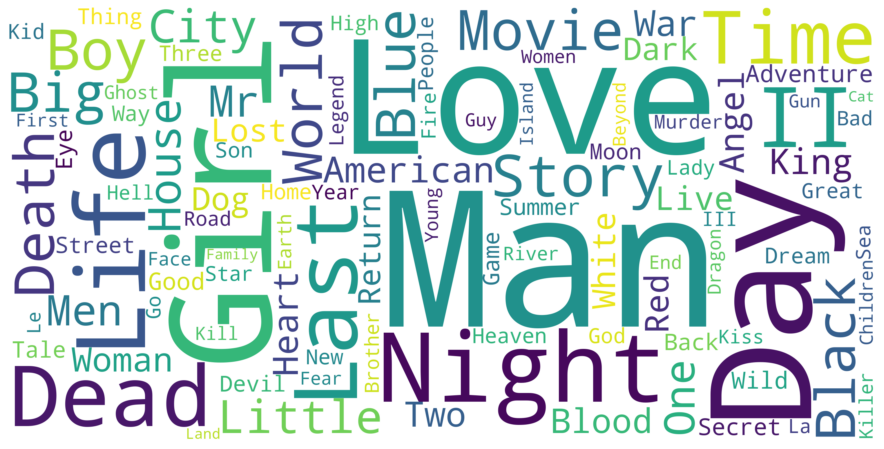

In [20]:
title_wordcloud = WordCloud(background_color='white', height=1500, width=3000, max_words= 100).generate(title_join)
plt.figure(figsize=(20,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

__Comparing Franchise vs. Stand-alone movies: Average Revenue/Return on Investment / Profitability/ Average Budget__
    

In [21]:
df["Franchised"] = df.belongs_to_collection.notna()
df.Franchised.value_counts()

False    13702
True      2034
Name: Franchised, dtype: int64

In [22]:
#Franchise vs. Stand-alone: Average Revenue
df.groupby("Franchised").revenue_musd.mean()

Franchised
False     46.567265
True     137.440807
Name: revenue_musd, dtype: float64

In [23]:
# Franchise vs. Stand-alone: Return on Investment / Profitability
df["ROI"] = df.revenue_musd.div(df.budget_musd)
df.groupby("Franchised").ROI.median()

Franchised
False    1.640647
True     3.830294
Name: ROI, dtype: float64

In [24]:
#Franchise vs. Stand-alone:mean
df.groupby("Franchised").budget_musd.mean()

Franchised
False    21.574282
True     32.889780
Name: budget_musd, dtype: float64

In [25]:

df.groupby("Franchised").agg({"revenue_musd": "mean","budget_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median"})

,revenue_musd,budget_musd,vote_average,popularity,ROI
Franchised,,,,,
False,46.567265,21.574282,6.227420,4.032419,1.640647
True,137.440807,32.889780,6.090448,7.704955,3.830294


__Most Successful Franchises ( I use their revenue and vote average as example):__

In [26]:
Franchised = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median", 
                                                      "vote_count":"mean"})
Franchised

title budget_musd         \
                                               count         sum   mean   
belongs_to_collection                                                     
100 Girls Collection                               1         0.0    NaN   
101 Dalmatians (Animated) Collection               1         4.0   4.00   
101 Dalmatians (Live-Action) Collection            2       139.0  69.50   
12 Rounds Collection                               1        20.0  20.00   
2 Days In... Collection                            1         0.0    NaN   
...                                              ...         ...    ...   
Zu Warriors Collection                             1         0.0    NaN   
[REC] Collection                                   2         7.1   3.55   
xXx Collection                                     2       130.0  65.00   
Ð˜Ñ€Ð¾Ð½Ð¸Ñ ÑÑƒÐ´ÑŒÐ±Ñ‹ (ÐšÐ¾Ð»Ð»ÐµÐºÑ†Ð¸Ñ)     1         0.0    NaN   
ç”·ã¯ã¤ã‚‰ã„ã‚ˆ ã‚·ãƒªãƒ¼ã‚º                    3         0.0    NaN   

                                               revenue_musd              \
                                                        sum        mean   
belongs_to_collection                                                     
100 Girls Collection                               0.000000         NaN   
101 Dalmatians (Animated) Collection             215.880014  215.880014   
101 Dalmatians (Live-Action) Collection          504.301065  252.150532   
12 Rounds Collection                              17.280326   17.280326   
2 Days In... Collection                           19.776159   19.776159   
...                                                     ...         ...   
Zu Warriors Collection                             0.000000         NaN   
[REC] Collection                                  48.917680   24.458840   
xXx Collection                                   348.522314  174.261157   
Ð˜Ñ€Ð¾Ð½Ð¸Ñ ÑÑƒÐ´ÑŒÐ±Ñ‹ (ÐšÐ¾Ð»Ð»ÐµÐºÑ†Ð¸Ñ)     0.000000         NaN   
ç”·ã¯ã¤ã‚‰ã„ã‚ˆ ã‚·ãƒªãƒ¼ã‚º                    0.000000         NaN   

                                               vote_average popularity  \
                                                       mean       mean   
belongs_to_collection                                                    
100 Girls Collection                                   5.60   5.136537   
101 Dalmatians (Animated) Collection                   6.80  15.727519   
101 Dalmatians (Live-Action) Collection                5.35   9.569750   
12 Rounds Collection                                   5.70  13.591485   
2 Days In... Collection                                6.30   6.653254   
...                                                     ...        ...   
Zu Warriors Collection                                 6.60   1.401607   
[REC] Collection                                       6.80   8.678840   
xXx Collection                                         5.25  15.933496   
Ð˜Ñ€Ð¾Ð½Ð¸Ñ ÑÑƒÐ´ÑŒÐ±Ñ‹ (ÐšÐ¾Ð»Ð»ÐµÐºÑ†Ð¸Ñ)         7.20   2.694572   
ç”·ã¯ã¤ã‚‰ã„ã‚ˆ ã‚·ãƒªãƒ¼ã‚º                        7.00   0.038901   

                                                      ROI     vote_count  
                                                   median           mean  
belongs_to_collection                                                     
100 Girls Collection                                  NaN     119.000000  
101 Dalmatians (Animated) Collection            53.970003    1643.000000  
101 Dalmatians (Live-Action) Collection          4.049415  361163.500000  
12 Rounds Collection                             0.864016     223.000000  
2 Days In... Collection                               NaN     106.000000  
...                                                   ...            ...  
Zu Warriors Collection                                NaN      14.000000  
[REC] Collection                                11.798412  477248.000000  
xXx Collection                                   2.574057  727282.500000  
Ð˜Ñ€Ð¾Ð½

In [27]:
Franchised.nlargest(5, ("revenue_musd", "mean"))

title budget_musd             revenue_musd  \
                                 count         sum        mean          sum   
belongs_to_collection                                                         
Avatar Collection                    1       237.0  237.000000  2787.965087   
Alice in Wonderland Collection       1       200.0  200.000000  1025.491110   
The Lord of the Rings Collection     3       266.0   88.666667  2916.544743   
Finding Nemo Collection              1        94.0   94.000000   940.335536   
Harry Potter Collection              6       905.0  150.833333  5411.061557   

                                              vote_average  popularity  \
                                         mean         mean        mean   
belongs_to_collection                                                    
Avatar Collection                 2787.965087     7.200000  185.070892   
Alice in Wonderland Collection    1025.491110     6.400000   17.285093   
The Lord of the Rings Collection   972.181581     8.033333   30.272873   
Finding Nemo Collection            940.335536     7.600000   25.497794   
Harry Potter Collection            901.843593     7.483333   26.956675   

                                        ROI    vote_count  
                                     median          mean  
belongs_to_collection                                      
Avatar Collection                 11.763566  1.211400e+04  
Alice in Wonderland Collection     5.127456  4.773000e+03  
The Lord of the Rings Collection  11.725157  2.964255e+11  
Finding Nemo Collection           10.003570  6.292000e+03  
Harry Potter Collection            6.165086  1.198099e+23

In [28]:
Franchised[Franchised[("vote_count", "mean")] >=10000].nlargest(5, ("vote_average", "mean"))

title budget_musd             revenue_musd  \
                                 count         sum        mean          sum   
belongs_to_collection                                                         
The Human Condition                  3         0.0         NaN     0.000000   
The Lord of the Rings Collection     3       266.0   88.666667  2916.544743   
The Apu Collection                   3         0.0         NaN     0.722579   
The Godfather Collection             3        73.0   24.333333   429.375314   
The Dark Knight Collection           2       335.0  167.500000  1378.777117   

                                             vote_average popularity  \
                                        mean         mean       mean   
belongs_to_collection                                                  
The Human Condition                      NaN     8.466667   2.333018   
The Lord of the Rings Collection  972.181581     8.033333  30.272873   
The Apu Collection                  0.240860     8.000000   3.027675   
The Godfather Collection          143.125105     7.966667  31.641307   
The Dark Knight Collection        689.388559     7.900000  75.836300   

                                        ROI    vote_count  
                                     median          mean  
belongs_to_collection                                      
The Human Condition                     NaN  1.410427e+05  
The Lord of the Rings Collection  11.725157  2.964255e+11  
The Apu Collection                      NaN  2.113480e+05  
The Godfather Collection           3.657142  2.008114e+11  
The Dark Knight Collection         3.962418  3.755561e+08

__The most successful director based on the total votes __ 

In [29]:
best_director = df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum", "revenue_musd":"sum"})
best_director 

,title,vote_average,vote_count,revenue_musd
director,,,,
50 Cent,1,4.70000,6,0.000000
A. Dean Bell,1,6.10000,4,0.000000
A. Edward Sutherland,4,4.40000,25561,0.000000
A.W. Vidmer,1,10.00000,1,0.000000
AJ Schnack,2,7.55000,222,0.000000
...,...,...,...,...
Ã‰ric Rohmer,21,6.87619,425121213422254535111023249108671216,0.000000
Ã‰tienne Chatiliez,5,6.32000,237438702,0.000000
Ã‰va GÃ¡rdos,1,6.00000,14,0.850225


In [30]:
best_director[(best_director.vote_average>7) & (best_director.title >= 10) ].nlargest(5,"revenue_musd" )

,title,vote_average,vote_count,revenue_musd
director,,,,
Peter Jackson,10,7.110000,2994133881966888927641822624031101,3592.721303
Martin Scorsese,26,7.219231,1343263217232119686929220629722838641964306251...,1389.474465
Hayao Miyazaki,10,7.840000,2041396817308778081707685632049953,877.964671
Joel Coen,14,7.092857,28020804315483001308114436645040042130831251492,705.775716
Stanley Kubrick,13,7.423077,14723075565343225953890126629010147240952166,446.445530
